In [94]:
import json
import pandas as pd
import seaborn as sns

In [81]:
MONTHS = [
    "jan",
    "feb",
    "mar",
    "apr",
    "may",
    "jun",
    "jul",
    "aug",
    "sep",
    "oct",
    "nov",
    "dec",
]

CURRENTLY_MONTH = "mar"


In [72]:
# read from json
with open('app/stocks.json') as f:
    data = json.load(f)

data

{'BBSE3': {'quantity': {'jan': 178, 'feb': 178}},
 'CVCB3': {'quantity': {'jan': 203, 'feb': 203}},
 'EGIE3': {'quantity': {'jan': 165, 'feb': 165}},
 'ENBR3': {'quantity': {'jan': 379, 'feb': 379}},
 'ITSA4': {'quantity': {'jan': 1390, 'feb': 1390}},
 'PETR4': {'quantity': {'jan': 218, 'feb': 218}},
 'TAEE11': {'quantity': {'jan': 162, 'feb': 162}},
 'UNIP6': {'quantity': {'jan': 194, 'feb': 194}},
 'VIVT3': {'quantity': {'jan': 121, 'feb': 121}},
 'WIZC3': {'quantity': {'jan': 389, 'feb': 389}},
 'BRAP4': {'quantity': {'jan': 140, 'feb': 140}},
 'ALUP11': {'quantity': {'jan': 82, 'feb': 82}},
 'TUPY3': {'quantity': {'jan': 100, 'feb': 100}},
 'BPAC11': {'quantity': {'jan': 176, 'feb': 176}},
 'HSML11': {'quantity': {'jan': 24, 'feb': 24}},
 'RBRP11': {'quantity': {'jan': 26, 'feb': 26}},
 'RDOR3': {'quantity': {'jan': 156, 'feb': 156}},
 'ABCB4': {'quantity': {'jan': 169, 'feb': 169}},
 'CCRO3': {'quantity': {'jan': 198, 'feb': 198}},
 'MRVE3': {'quantity': {'jan': 297, 'feb': 297}},

## Table with stocks name and quantities on a specific month

In [116]:
# convert to dataframe
stocks = []
qtt_by_month = []
for item in data.items():
    stocks.append(item[0])
    quantities_by_month = item[1].get('quantity')
    qtt_by_month.append(quantities_by_month)
    
df_qtd = pd.DataFrame(qtt_by_month, index=stocks)
df_qtd


,jan,feb
BBSE3,178,178
CVCB3,203,203
EGIE3,165,165
ENBR3,379,379
ITSA4,1390,1390
PETR4,218,218
TAEE11,162,162
UNIP6,194,194
VIVT3,121,121
WIZC3,389,389


## Table with the price of closing of the stocks by month

In [90]:
import pandas_datareader.data as web
import seaborn as sns
import yfinance as yf

yf.pdr_override()

data_inicial = "2022-12-20"
df_prices = pd.DataFrame(index=stocks)

for month in MONTHS:
    if month == CURRENTLY_MONTH:
        break
    data_final = f'2023-{MONTHS.index(month)+1}-01'

    stocks = df.index.to_list()
    closing_price = []

    for stock in stocks:
        prices = web.DataReader(f'{stock}.SA', start=data_inicial, end=data_final)
        if prices.shape[0] == 0:
            closing_price.append(0)
        else:
            closing_price.append(prices['Adj Close'].to_list()[-1])

    df_prices[month] = closing_price

df_prices


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,jan,feb
BBSE3,31.978338,35.839264
CVCB3,4.490000,4.500000
EGIE3,37.880001,39.349998
ENBR3,19.620800,20.370001
ITSA4,8.510000,8.530000
PETR4,24.500000,26.070000
TAEE11,33.309120,37.080002
UNIP6,88.010002,85.339996
VIVT3,37.319073,41.820000
WIZC3,7.010000,7.060000


## Totals by month

In [92]:
df_totals = df_qtd * df_prices
df_totals.sum(axis=0)

jan     98980.060371
feb    101748.284356
dtype: float64

In [148]:
df_total_reseted = df_totals.reset_index()
df_total_reseted.columns = ['stock', 'jan', 'feb']
df_total_reseted.to_csv("app/stocks_patrimonio.csv", index=False)

df_qtt_reseted = df_qtd.reset_index()
df_qtt_reseted.columns = ['stock', 'jan', 'feb']
df_qtt_reseted.to_csv("app/stocks_qtt.csv", index=False)

Text(0, 0.5, 'Total R$')

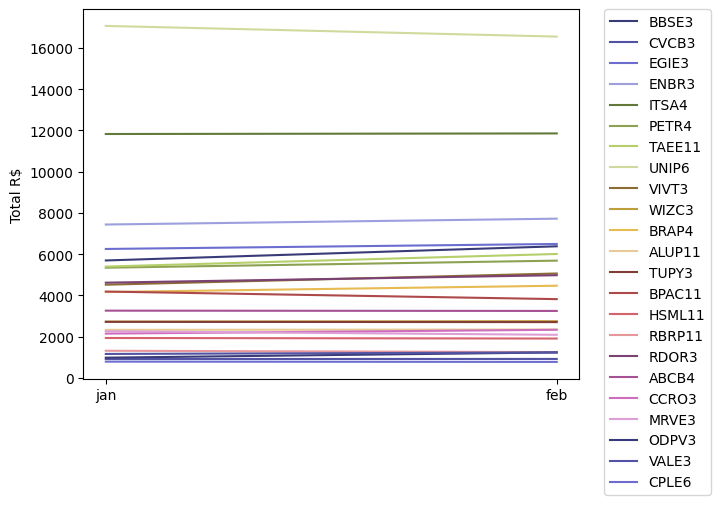

In [112]:
import matplotlib.pyplot as plt


df_lines = df_totals.reset_index().melt(id_vars="index")
_ = sns.lineplot(data=df, x="variable", y="value", hue="index", palette="tab20b")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("")
plt.ylabel("Total R$")

In [113]:
df_totals.index

Index(['BBSE3', 'CVCB3', 'EGIE3', 'ENBR3', 'ITSA4', 'PETR4', 'TAEE11', 'UNIP6',
       'VIVT3', 'WIZC3', 'BRAP4', 'ALUP11', 'TUPY3', 'BPAC11', 'HSML11',
       'RBRP11', 'RDOR3', 'ABCB4', 'CCRO3', 'MRVE3', 'ODPV3', 'VALE3',
       'CPLE6'],
      dtype='object')

In [114]:
sectors = {
    "BBSE3": "Financeiro / Previdência e Seguros / Seguradoras",
    "CVCB3": "Consumo Cíclico / Viagens e Lazer / Viagens e Turismo",
    "EGIE3": "Utilidade Pública / Energia Elétrica / Energia Elétrica",
    "ENBR3": "Utilidade Pública / Energia Elétrica / Energia Elétrica",
    "ITSA4": "Financeiro / Intermediários Financeiros / Bancos",
    "PETR4": "Petróleo. Gás e Biocombustíveis / Petróleo. Gás e Biocombustíveis / Exploração. Refino e Distribuição",
    "TAEE11": "Utilidade Pública / Energia Elétrica / Energia Elétrica",
    "UNIP6": "Materiais Básicos / Químicos / Químicos Diversos",
    "VIVT3": "Comunicações / Telecomunicações / Telecomunicações",
    "WIZC3": "Financeiro / Previdência e Seguros / Corretoras de Seguros e Resseguros",
    "BRAP4": "Materiais Básicos / Mineração / Minerais Metálicos",
    "ALUP11": "Utilidade Pública / Energia Elétrica / Energia Elétrica",
    "TUPY3": "Bens Industriais / Material de Transporte / Material Rodoviário",
    "BPAC11": "Financeiro / Intermediários Financeiros / Bancos",
    "HSML11": "Fundo Imobiliário",
    "RBRP11": "Fundo Imobiliário",
    "RDOR3": "Saúde / Serv.Méd.Hospit..Análises e Diagnósticos / Serv.Méd.Hospit..Análises e Diagnósticos",
    "ABCB4": "Financeiro / Intermediários Financeiros / Bancos",
    "CCRO3": "Bens Industriais / Transporte / Exploração de Rodovias",
    "MRVE3": "Consumo Cíclico / Construção Civil / Incorporações",
    "ODPV3": "Saúde / Serv.Méd.Hospit..Análises e Diagnósticos / Serv.Méd.Hospit..Análises e Diagnósticos",
    "VALE3": "Materiais Básicos / Mineração / Minerais Metálicos",
    "CPLE6": "Utilidade Pública / Energia Elétrica / Energia Elétrica"
}



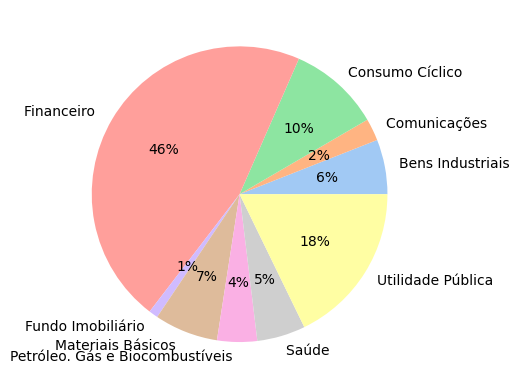

In [144]:
companies_sectors_df = pd.DataFrame({"companies": sectors.keys(), "sector": sectors.values()})
companies_sectors_df["sector_simple"] = companies_sectors_df["sector"].str.split("/").map(lambda x: x[0])

sector_pie = df_qtd.merge(
    companies_sectors_df,
    left_index=True,
    right_on="companies",
    how="left"
).groupby("sector_simple")["feb"].agg(sum).reset_index()

quantities = sector_pie["feb"]
labels = sector_pie["sector_simple"]

colors = sns.color_palette('pastel')[0:13]

plt.pie(quantities, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

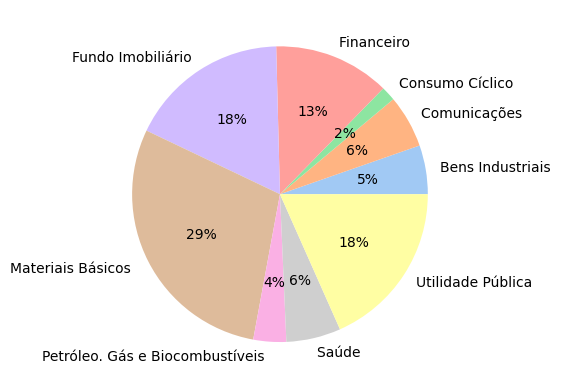

In [145]:
companies_sectors_df = pd.DataFrame({"companies": sectors.keys(), "sector": sectors.values()})
companies_sectors_df["sector_simple"] = companies_sectors_df["sector"].str.split("/").map(lambda x: x[0])

sector_pie = df_prices.merge(
    companies_sectors_df,
    left_index=True,
    right_on="companies",
    how="left"
).groupby("sector_simple")["feb"].agg(sum).reset_index()

quantities = sector_pie["feb"]
labels = sector_pie["sector_simple"]

colors = sns.color_palette('pastel')[0:13]

plt.pie(quantities, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

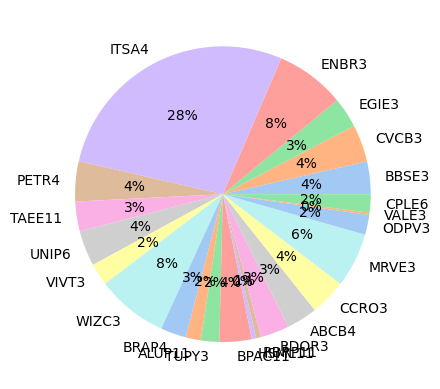

In [120]:
# pie by company
quantities = df_qtd["feb"]
labels = df_qtd.index.to_list()

colors = sns.color_palette('pastel')[0:18]

plt.pie(quantities, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()